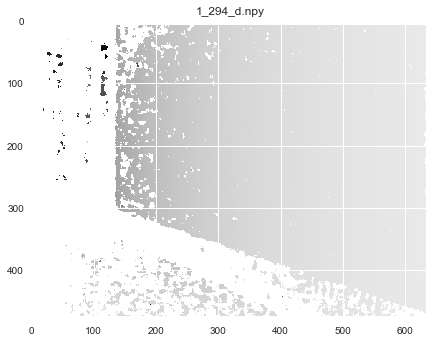

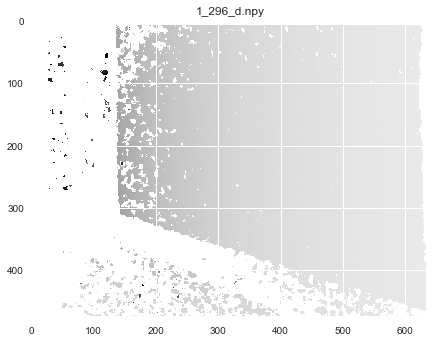

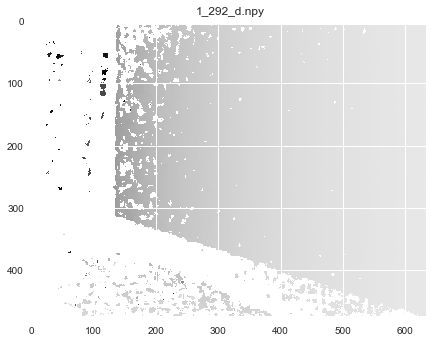

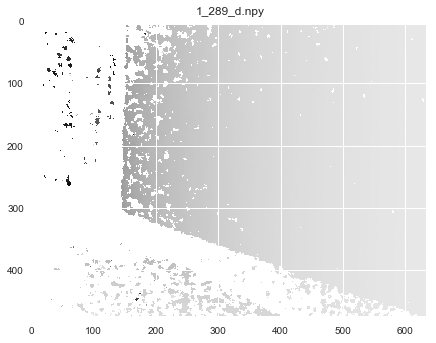

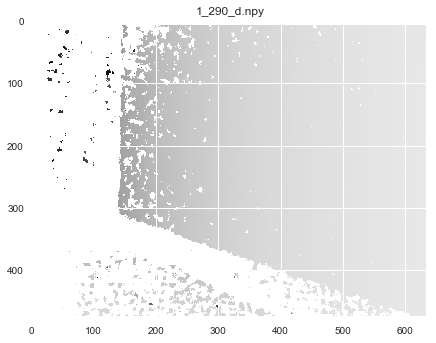

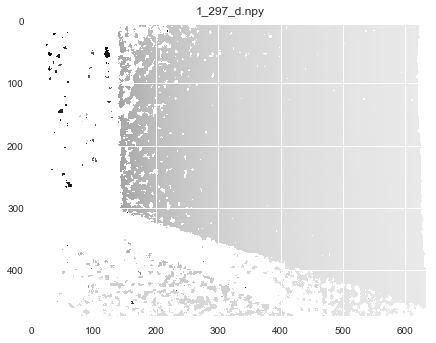

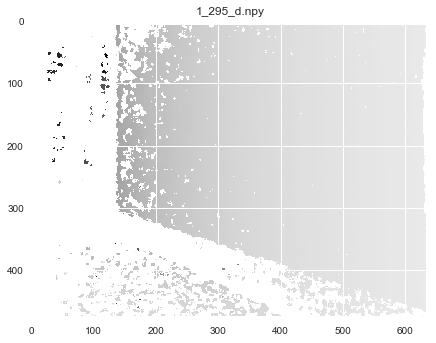

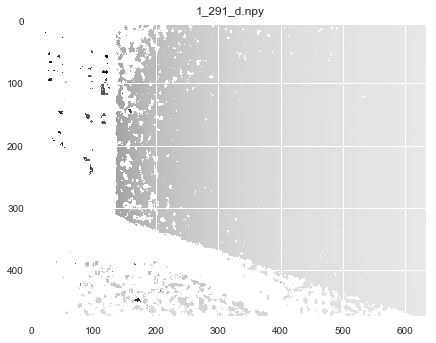

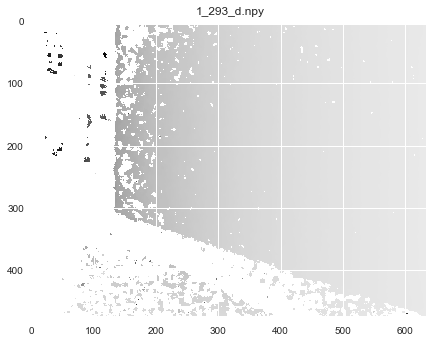

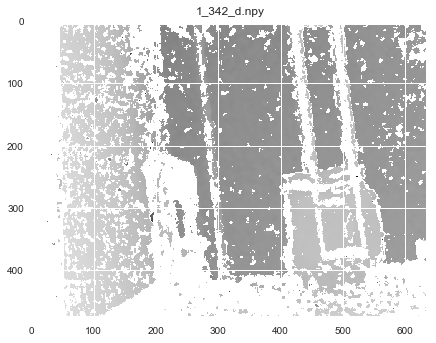

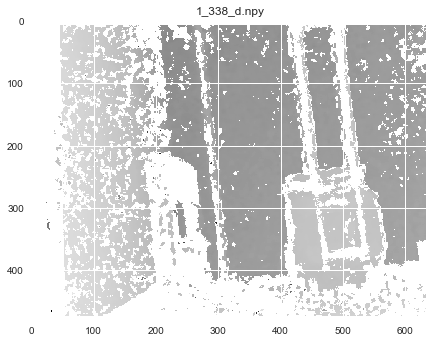

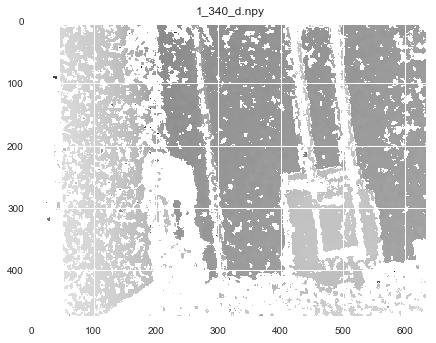

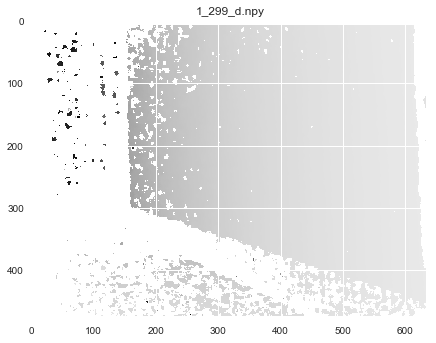

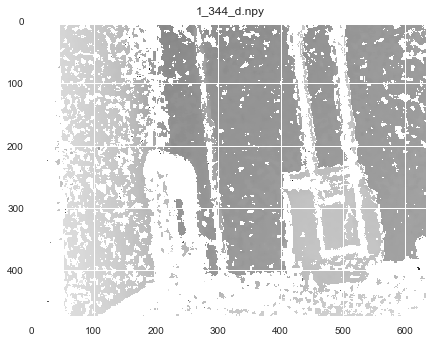

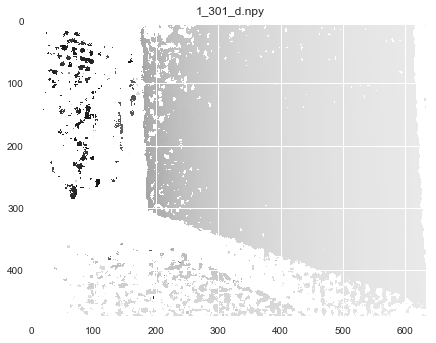

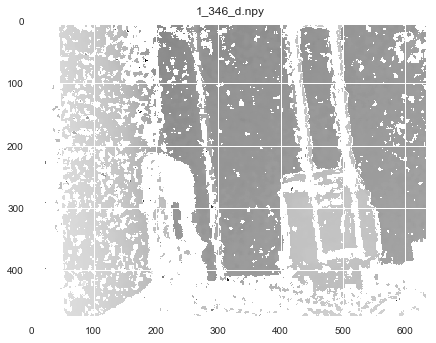

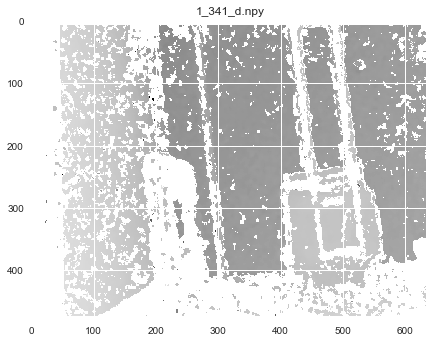

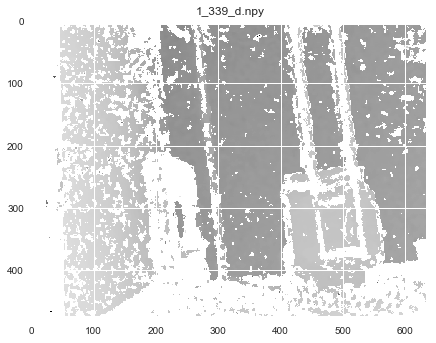

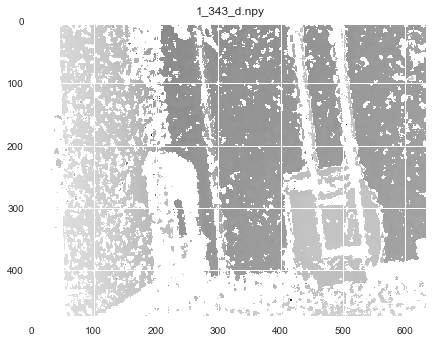

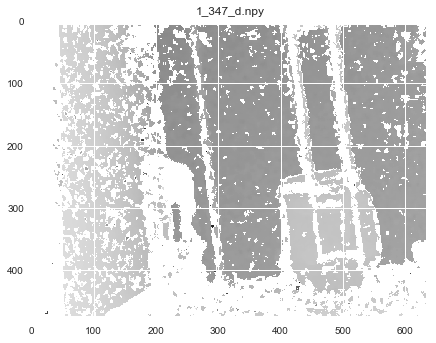

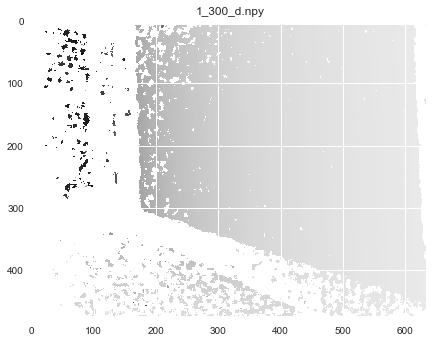

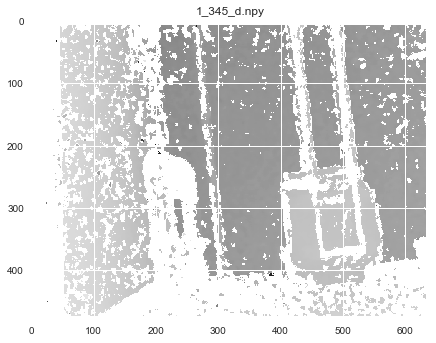

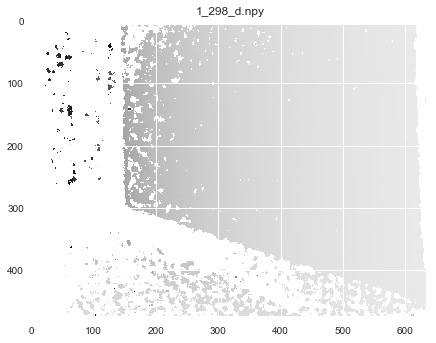

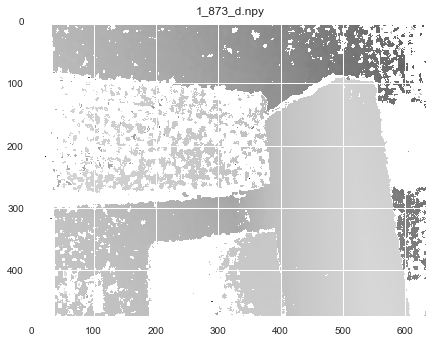

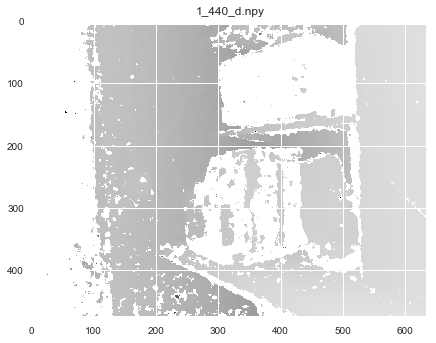

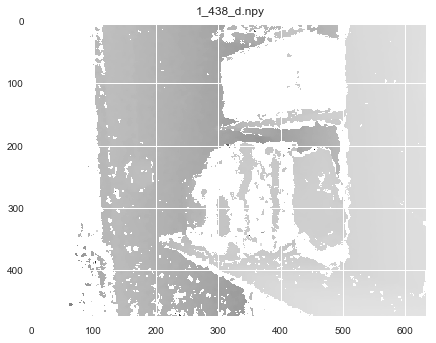

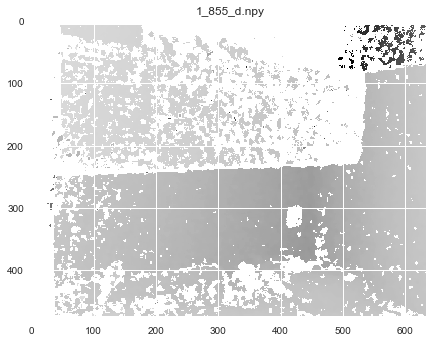

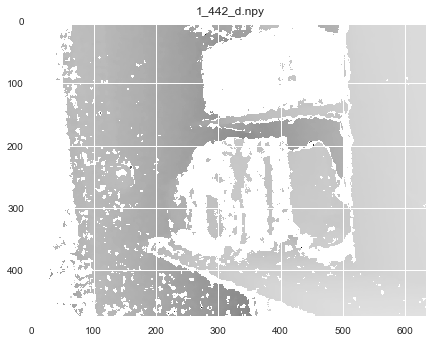

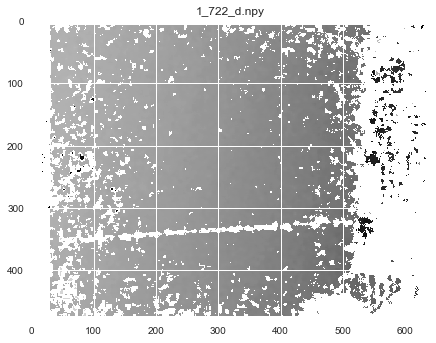

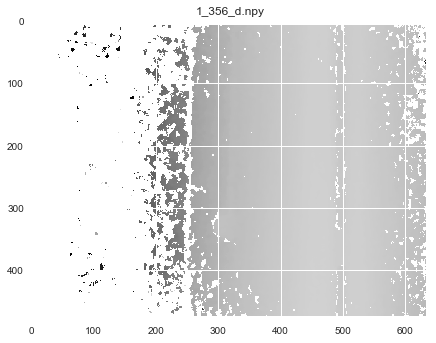

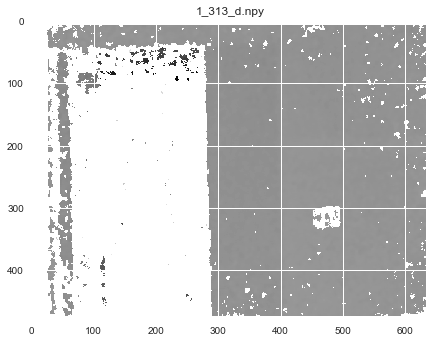

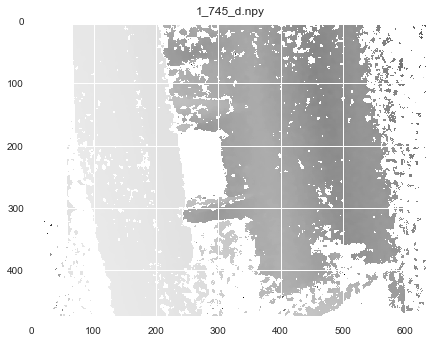

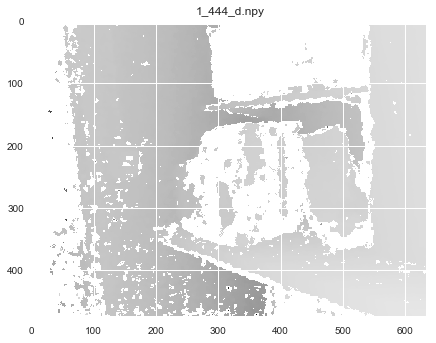

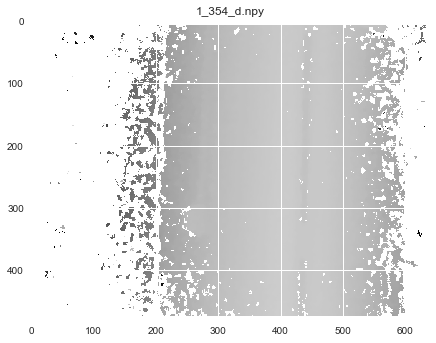

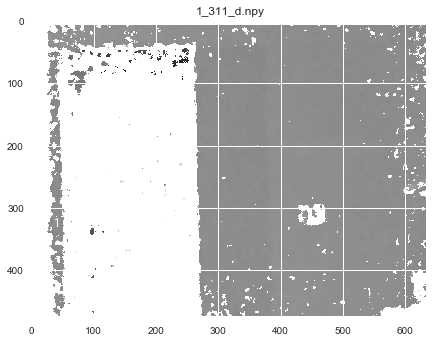

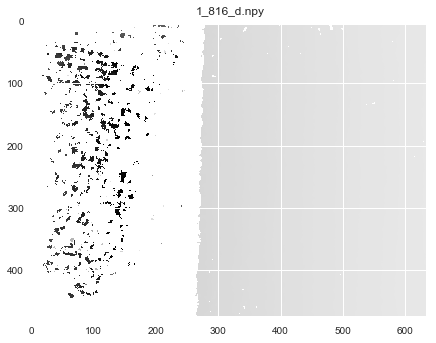

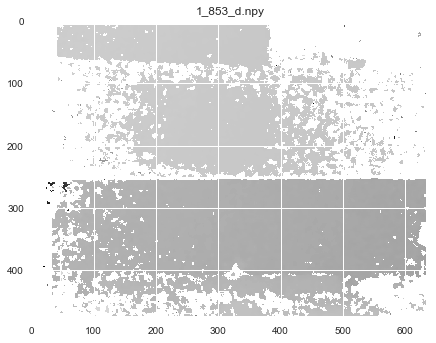

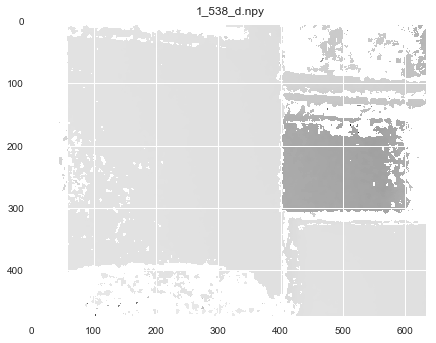

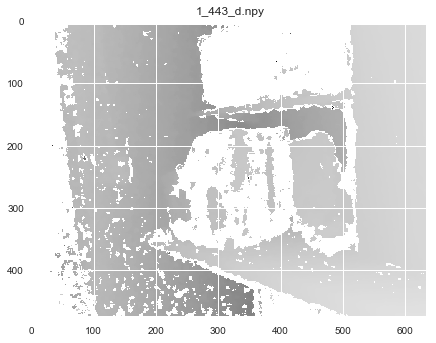

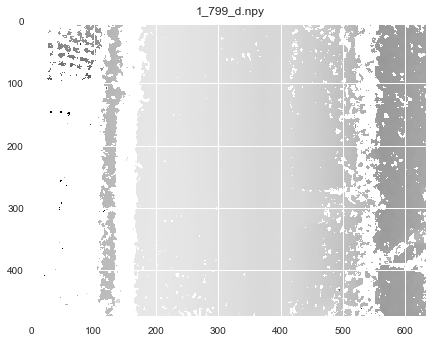

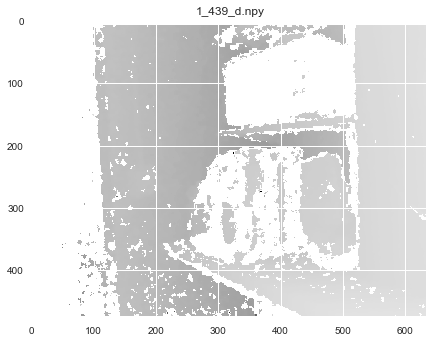

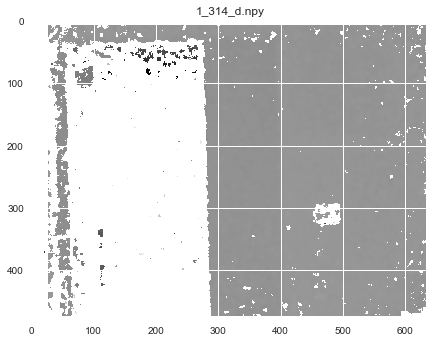

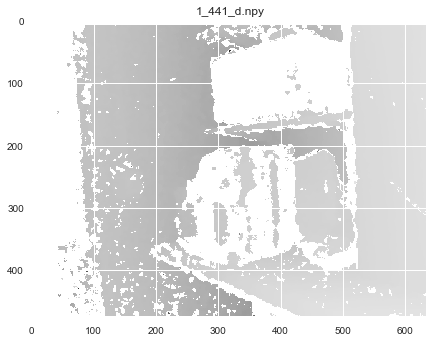

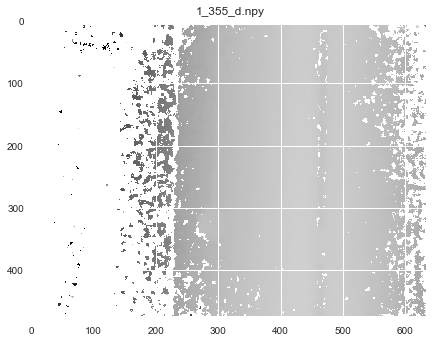

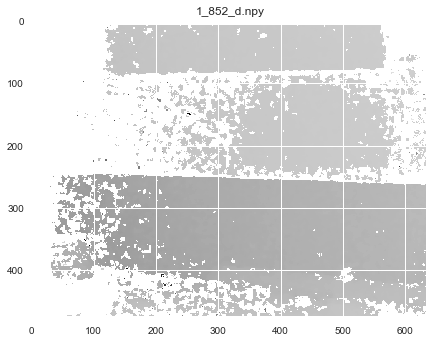

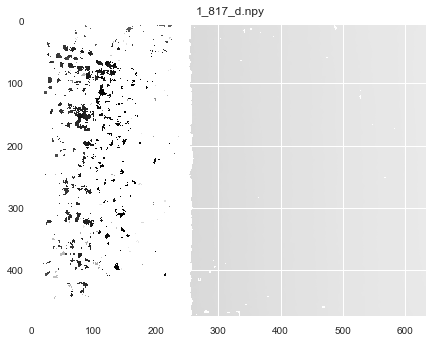

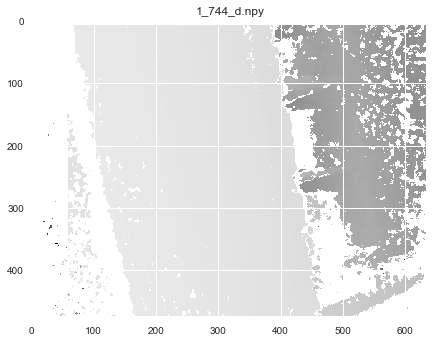

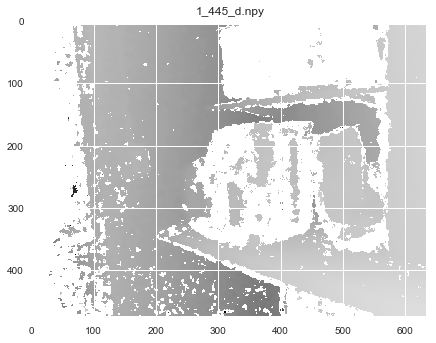

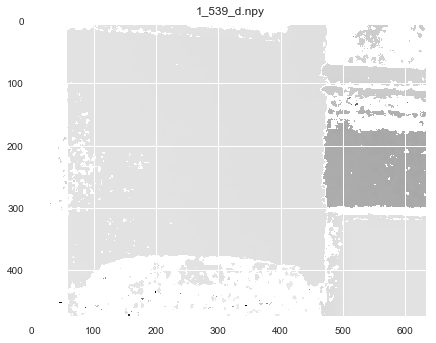

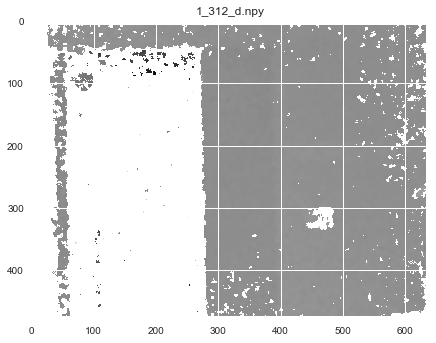

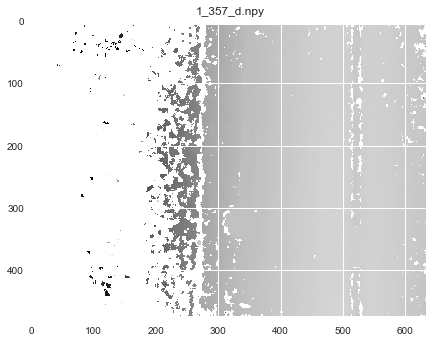

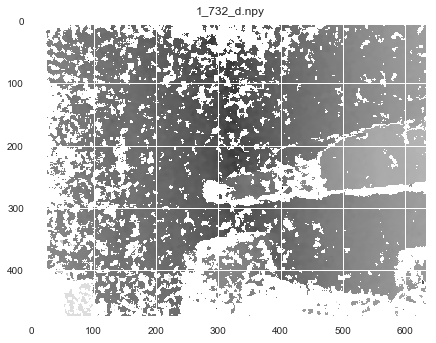

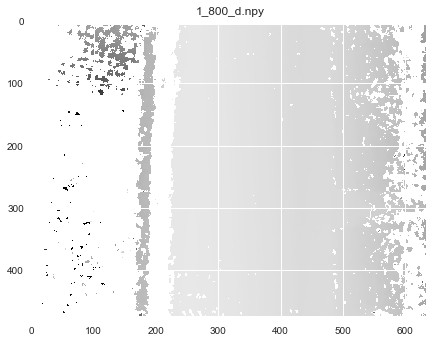

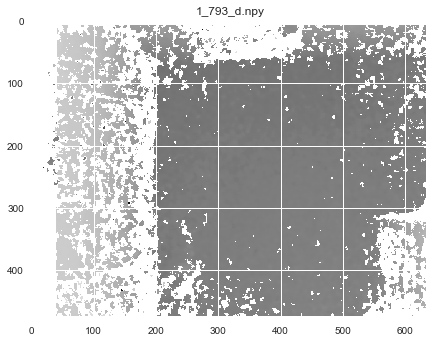

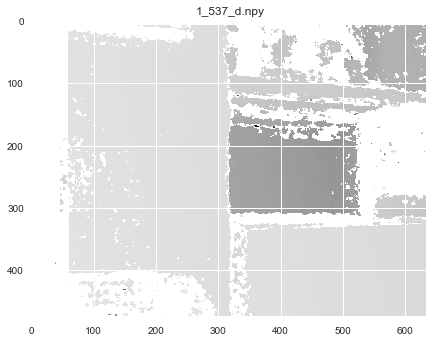

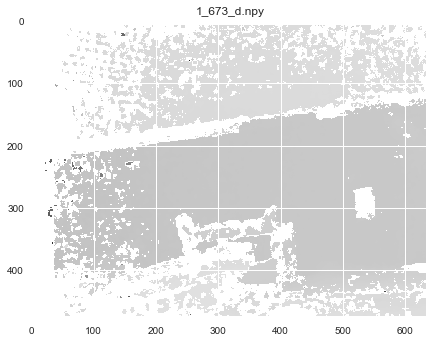

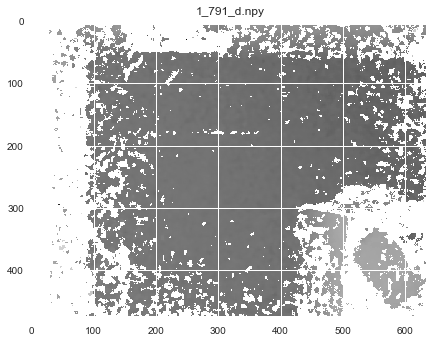

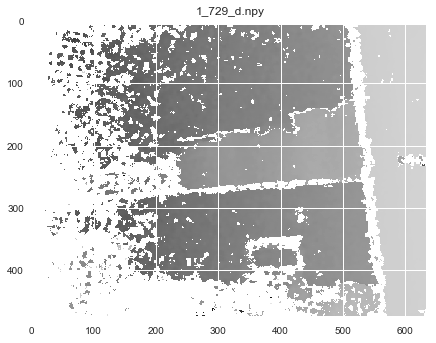

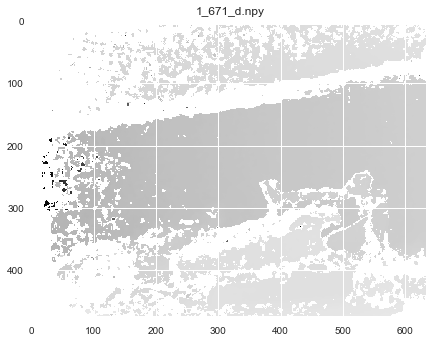

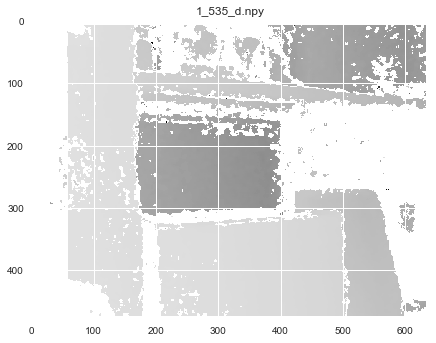

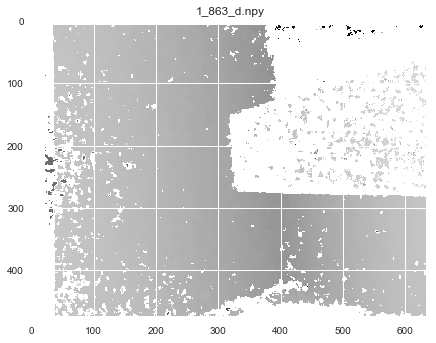

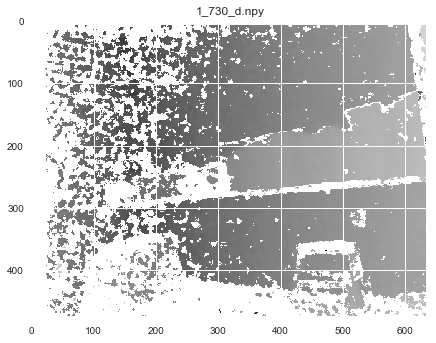

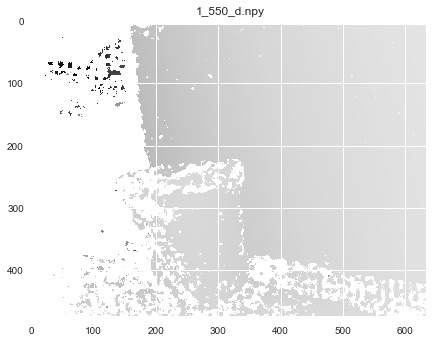

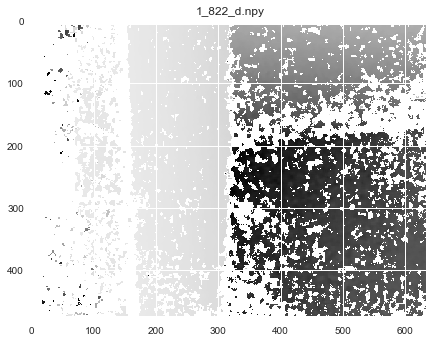

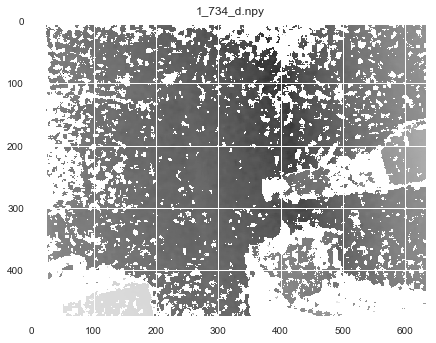

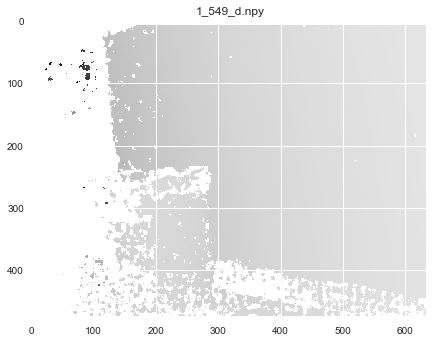

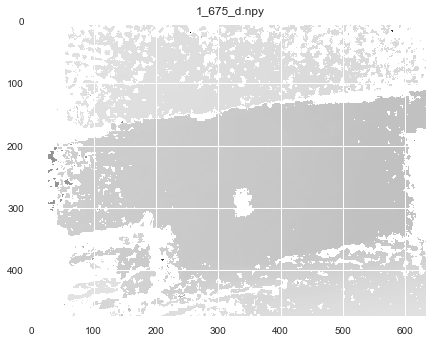

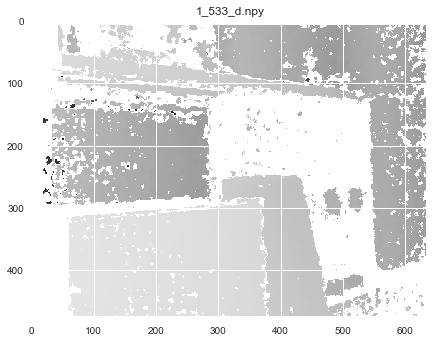

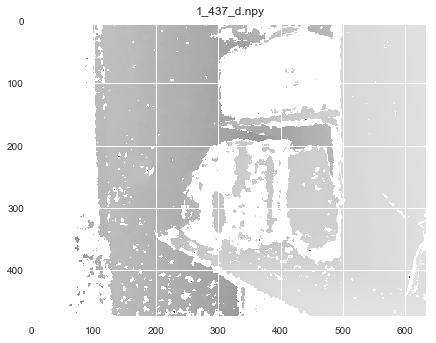

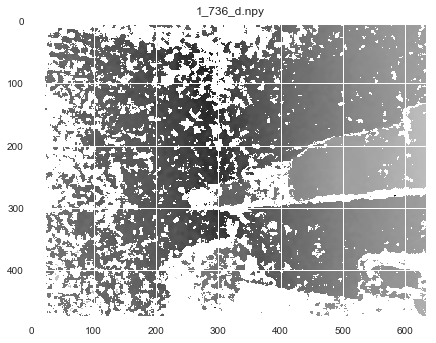

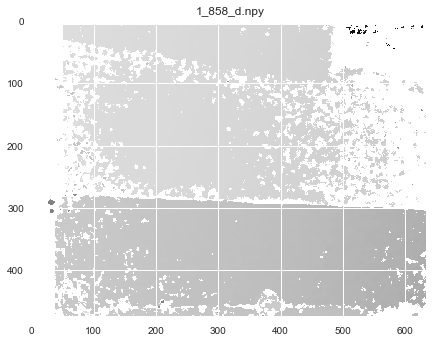

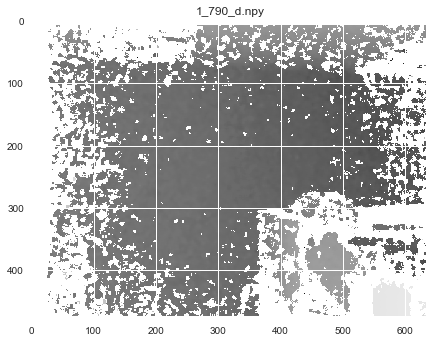

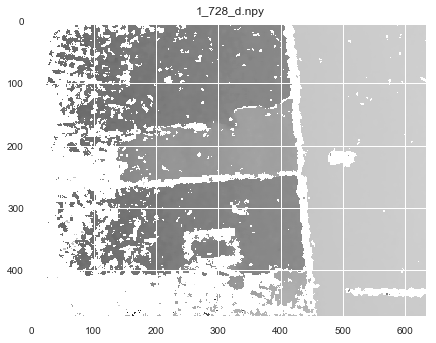

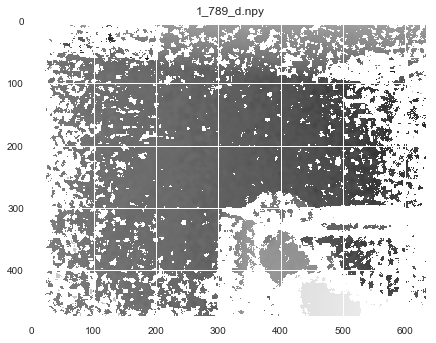

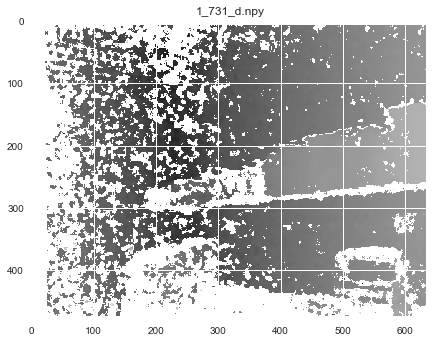

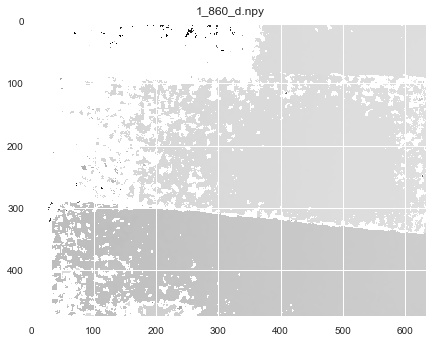

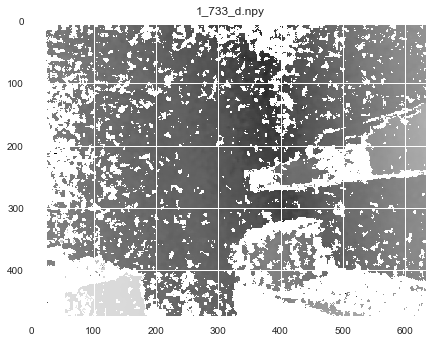

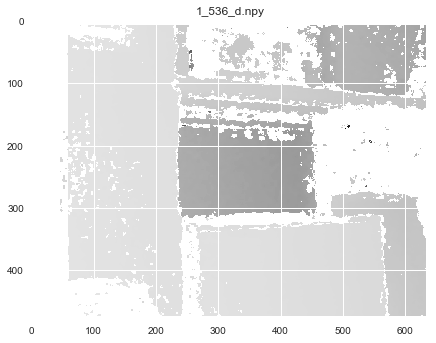

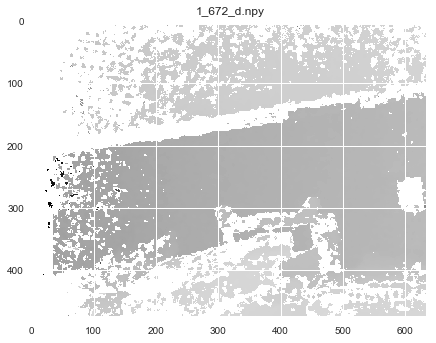

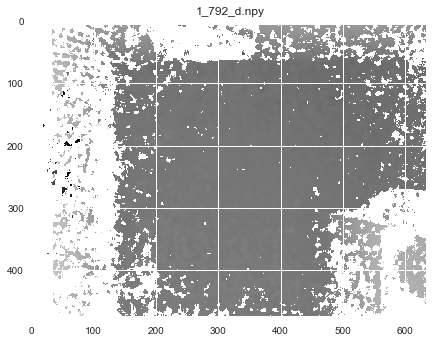

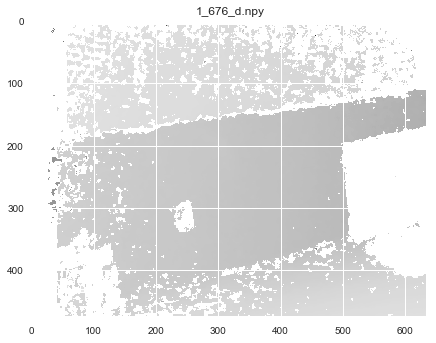

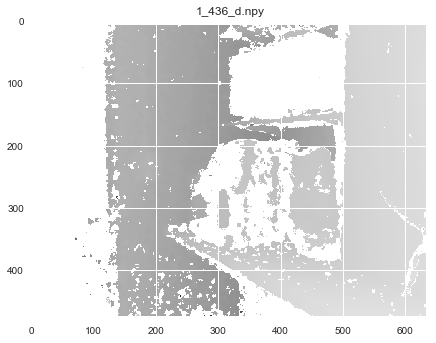

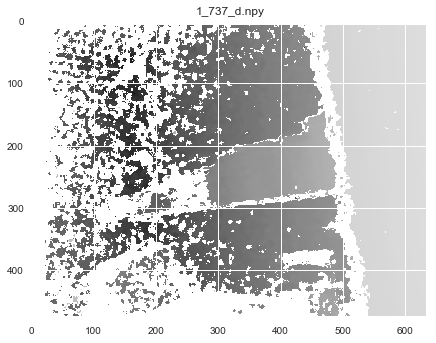

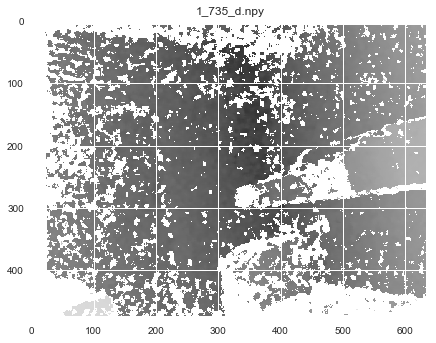

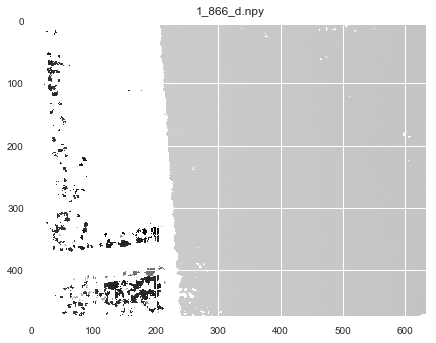

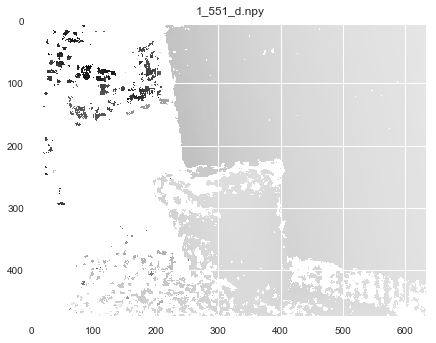

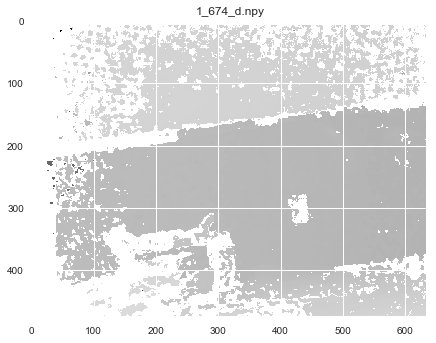

In [16]:
import pandas as pd
import numpy as np 
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn

def filterOutlier(data_list,z_score_threshold=3.5):
	"""
	Filters out outliers using the modified Z-Score method.
	"""
	# n = len(data_list)
	# z_score_threshold = (n-1)/np.sqrt(n)
	data = np.array(data_list)
	median = np.median(data)
	deviation = np.median([np.abs(x - median) for x in data])
	z_scores = [0.675*(x - median)/deviation for x in data]
	data_out = data[np.where(np.abs(z_scores) < z_score_threshold)].tolist()
	output = data_out if len(data_out) > 0 else data_list
	return output

data_dir = ["./data/sample_obstacle_course","./data/random_samples"]
# data_dir = ['./windmachine']

data = []
for data_path in data_dir:
    for f in os.listdir(data_path):
        if "d" in f:
            try:
                path = os.path.join(data_path,f)
                matrix = np.load(path)
                matrix[matrix > 4000] = 0.0
                nan = len(matrix[matrix < 1])
                total = len(matrix.flatten())
                result = 1 - nan/total
                data.append(result)
                if result > 0.57 and result < 0.7:
                    plt.figure()
                    plt.title(f)
                    plt.imshow(matrix)
                    plt.show()
            except TypeError:
                path = os.path.join(data_path,f)
                d= np.load(path)
                # for i in range(5):
                #     s = 'arr_{}'.format(i+1)
                s = 'arr_1'
                matrix = d[s]
                nan = len(matrix[matrix < 1])
                total = len(matrix.flatten())
                result = 1 - nan/total
                data.append(result)
                d.close()



In [17]:
# data = filterOutlier(data)
data = np.array(data)
data = data[abs(data - np.mean(data)) < 3 * np.std(data)]
print(data.mean())
print(data.std())
data = data.tolist()
print(data)

0.390345233736
0.147539655332
[0.3932259114583333, 0.6301888020833333, 0.42250651041666665, 0.39485351562500004, 0.36089843749999995, 0.38500651041666667, 0.40374023437499995, 0.38688151041666663, 0.37723307291666663, 0.37966796875, 0.36004882812500005, 0.3885579427083333, 0.39791341145833337, 0.41855794270833335, 0.37113281249999996, 0.36710611979166663, 0.39001302083333333, 0.380146484375, 0.00010742187500001332, 0.40511718750000003, 0.3915559895833334, 0.3920475260416667, 3.2552083333303727e-06, 0.4053483072916667, 0.4256022135416667, 0.376572265625, 0.36972005208333336, 0.38937825520833336, 0.3711686197916667, 0.3714322916666667, 0.3629752604166666, 0.38073893229166667, 0.39175781249999997, 0.3871028645833333, 0.3907942708333333, 0.3756803385416667, 0.6179752604166666, 0.351708984375, 0.3735677083333333, 0.40713867187499997, 0.3888736979166667, 0.38099283854166666, 0.3637239583333334, 0.3800748697916667, 0.6326595052083333, 0.39737304687499997, 0.389892578125, 0.37627929687499995, 

In [18]:
series = pd.Series(data)
series.name = 'Data Density'
print(series.min())
series.head()

0.0


0    0.393226
1    0.630189
2    0.422507
3    0.394854
4    0.360898
Name: Data Density, dtype: float64

In [19]:
bins = pd.cut(series,50)
histogram = bins.value_counts()
print(type(histogram))

<class 'pandas.core.series.Series'>


In [20]:
histogram.sort_index(inplace=True)
total = sum(histogram)
print(total)


896


In [21]:
histogram.index

CategoricalIndex([(-0.000834, 0.0167],    (0.0167, 0.0334],
                     (0.0334, 0.0501],    (0.0501, 0.0668],
                     (0.0668, 0.0834],       (0.0834, 0.1],
                         (0.1, 0.117],      (0.117, 0.134],
                        (0.134, 0.15],       (0.15, 0.167],
                       (0.167, 0.184],        (0.184, 0.2],
                         (0.2, 0.217],      (0.217, 0.234],
                        (0.234, 0.25],       (0.25, 0.267],
                       (0.267, 0.284],        (0.284, 0.3],
                         (0.3, 0.317],      (0.317, 0.334],
                        (0.334, 0.35],       (0.35, 0.367],
                       (0.367, 0.384],      (0.384, 0.401],
                       (0.401, 0.417],      (0.417, 0.434],
                       (0.434, 0.451],      (0.451, 0.467],
                       (0.467, 0.484],      (0.484, 0.501],
                       (0.501, 0.517],      (0.517, 0.534],
                       (0.534, 0.551],  

In [22]:
hist = [x/total for x in histogram]
span = series.max() - series.min()
index = np.linspace(series.min(),series.max(),len(hist))
index = map(lambda x: round(x,3),index)
print(index)
hist = pd.Series(hist,index=index)

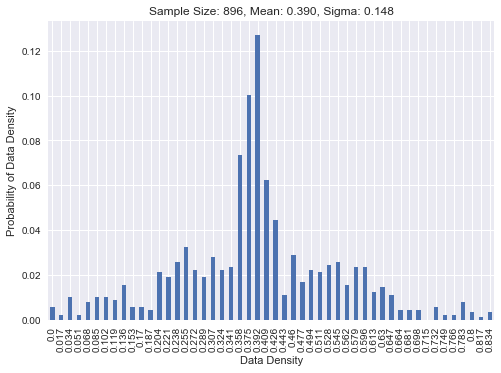

In [26]:
plt.figure("Depth_Sensor_Performance")
hist.plot(kind='bar')
plt.xlabel("Data Density")
plt.ylabel("Probability of Data Density")
plt.title("Sample Size: 896, Mean: 0.390, Sigma: 0.148")
plt.show()